<a href="https://colab.research.google.com/github/Deep-MI/olf-bulb-segmentation/blob/main/OB_pipeline_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Quick and Easy - Olfactory Bulb (OB) Segmentation with three clicks**

Google Colab allows to a create virtual machine in your web browser in which you can run the OB pipeline. For more information on how to use colab and neuroimage tools such as *FastSuferCNN* for whole brain segmentation check our Tutorial page :  https://github.com/Deep-MI/FastSurfer/tree/master/Tutorial



### Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

### 1 - Upload Image 
 - You can use your own T2 or download a T2 sample image from  https://nextcloud.dzne.de/index.php/s/QaYpocJn9HFN7jp


In [1]:
#@title Click the run button to upload your T2-weighted MRI image
from google.colab import files
! cd "/content"
uploaded = files.upload()

img = "/content/" + list(uploaded.keys())[0]

Saving T2_sample.nii.gz to T2_sample.nii.gz


In [2]:
# Check present files in colab base directory with ls command
!ls -l "/content"

total 18372
drwxr-xr-x 1 root root     4096 Aug 13 13:35 sample_data
-rw-r--r-- 1 root root 18806144 Aug 25 12:57 T2_sample.nii.gz


Note all data upload to colab,  will be automatically deleted once the session ends and is NOT recoverable!. Make sure to save  

## 2- Clone Repository

In [3]:
#@title Click to clone OB repository
# import libraries
import os
import sys
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/Deep-MI/olf-bulb-segmentation.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  sys.path.append(project_name)

# Install missign libraries in Colab
! pip install pyyaml==5.4.1 nilearn==0.8.0

# Go to the pipeline directory
%cd /content/olf-bulb-segmentation/

     |████████████████████████████████| 636 kB 5.4 MB/s 
     |████████████████████████████████| 4.9 MB 37.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
/content/olf-bulb-segmentation


### 3- Run OB pipeline 


In [4]:
# The pipeline is set in colab to run in default mode  add additionally flags if necesary
! python3 ./run_pipeline.py -in $img -out /content/output -sid sample

Given configuration file:  ./SegModels/AttFastSurferCNN/AttFastSurferCNN_weights.yml
Given configuration file:  ./LocModels/FastSurferCNN/FastSurferCNN_weights.yml
Successfully Created Directory @ /content/output/sample
Reading file /content/T2_sample.nii.gz
Input:    min: 0.0  max: 1008.9999845065176
rescale:  min: 0.0  max: 705.2909891700558  scale: 0.361552896486128
Output:   min: 0.0  max: 255.0
Cuda available: True, # Available GPUS: 1, Cuda user disabled (--no_cuda flag): False, --> Using device: cuda
Successfully Created Directory @ /content/output/sample/mri
------------------------------
Running localization models
--->Testing axial localization model
Model weights loaded from /content/olf-bulb-segmentation/LocModels/FastSurferCNN/v1_split_4_FastSurferCNN_axial.pkl
Input data shape (121, 191, 191)
input data transform to (191, 192, 192, 3)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:693: UserWarning: Named tensors and all their associated APIs are an experime

### 4- Segmentation Visualization


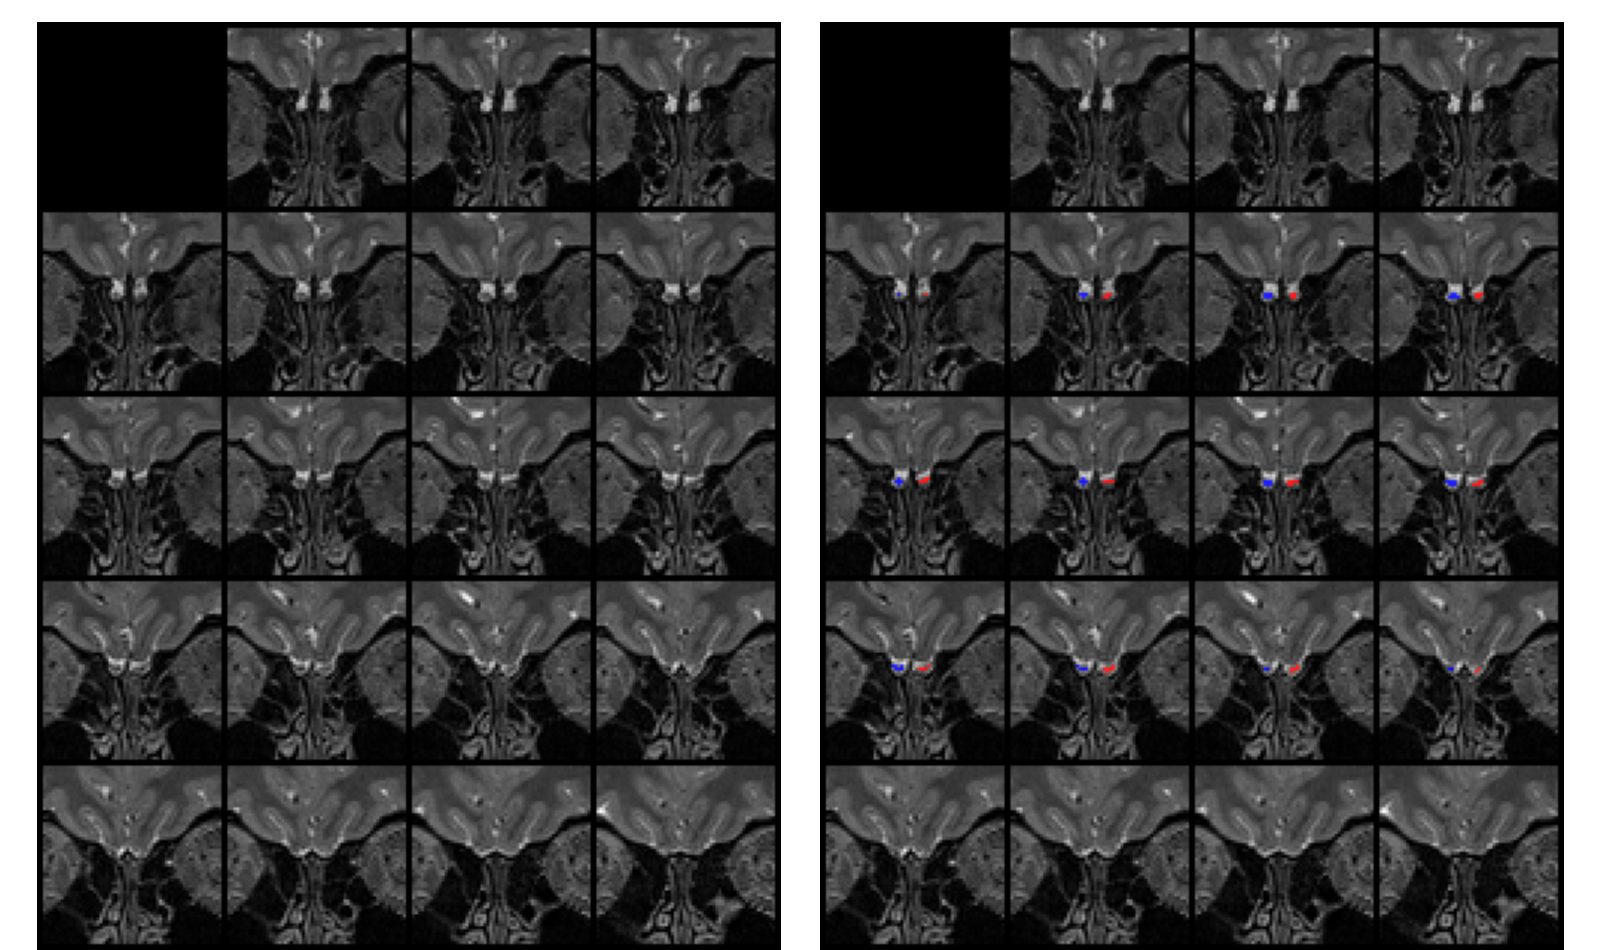

In [14]:
#@title Click to visualize results
from IPython.display import Image
Image("/content/output/sample/QC/coronal_screenshot.png")

### 5- Save Output

In [9]:
!zip -r /content/sample.zip /content/output/sample
from google.colab import files
files.download("/content/sample.zip")

updating: content/output/sample/ (stored 0%)
updating: content/output/sample/mri/ (stored 0%)
updating: content/output/sample/mri/loc_heatmap.nii.gz (deflated 59%)
updating: content/output/sample/mri/ob_seg.nii.gz (deflated 93%)
updating: content/output/sample/mri/loc_orig.nii.gz (deflated 1%)
updating: content/output/sample/mri/orig.nii.gz (deflated 0%)
updating: content/output/sample/QC/ (stored 0%)
updating: content/output/sample/QC/coronal_screenshot.png (deflated 4%)
updating: content/output/sample/QC/overall_screenshot.png (deflated 2%)
updating: content/output/sample/log.txt (deflated 87%)
updating: content/output/sample/stats/ (stored 0%)
updating: content/output/sample/stats/segmentation_stats.csv (deflated 35%)
updating: content/output/sample/stats/localization_stats.csv (deflated 7%)
